In [1]:
from platform import python_version
print('🐍 Python version:', python_version())

🐍 Python version: 3.12.2


In [2]:
# =========================================
# 1. Importing libraries
# =========================================
import numpy as np
import pandas as pd
import io
import requests
import re
import warnings
import os
import sklearn


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

# Configurações de visualização
plt.style.use('default')
sns.set_theme(palette="husl")
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12


/home/ti/anaconda3/lib/python3.12/site-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [3]:
# ======================================
# 2. Data loading
# ======================================
df = pd.read_csv("tested.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN       

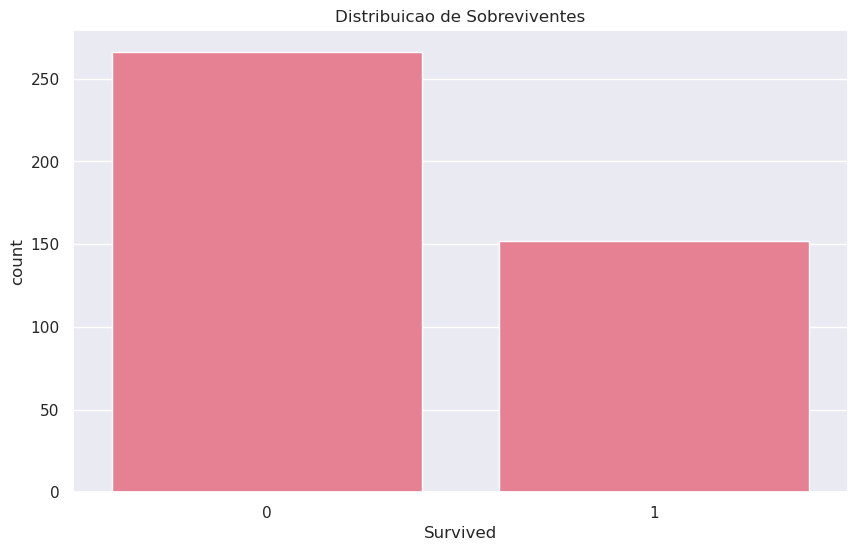

In [4]:
# ======================================
# 3. Initial Exploratory Analysis
# ======================================
print(df.info())
print(df.describe(include="all"))

sns.countplot(x="Survived", data=df)
plt.title("Distribuicao de Sobreviventes")
plt.show()


In [5]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df[df.Age.isnull()].shape

(86, 12)

In [9]:
df.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [10]:
df.Age.plot.box()

<Axes: >

In [11]:
df.Age.plot.hist()

<Axes: ylabel='Frequency'>

In [12]:
df.Age.median()

27.0

In [13]:
df.groupby('Pclass')['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [14]:
df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

In [15]:
df['Age'] = df.Age.fillna( df.groupby(['Pclass','Sex'])['Age'].transform('median'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
print(df[df['Fare'].isnull()])

     PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
152         1044         0       3  Storey, Mr. Thomas  male  60.5      0   

     Parch Ticket  Fare Cabin Embarked  
152      0   3701   NaN   NaN        S  


In [17]:
df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'))

In [18]:
df.Fare.plot.box()

<Axes: ylabel='Frequency'>

In [19]:
df[df.Fare == df.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [20]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [21]:
# Create family size (SibSp + Parch + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create indicator if alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extract titles from names
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
df[['Name','Title']]

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs
...,...,...
413,"Spector, Mr. Woolf",Mr
414,"Oliva y Ocana, Dona. Fermina",Rare
415,"Saether, Mr. Simon Sivertsen",Mr
416,"Ware, Mr. Frederick",Mr


In [22]:
print("Colunas disponíveis:")
print(df.columns.tolist())
print(f"\nShape do DataFrame: {df.shape}")

print(f"\nColuna 'Sex' existe: {'Sex' in df.columns}")
print(f"Coluna 'Embarked' existe: {'Embarked' in df.columns}")
print(f"Coluna 'Title' existe: {'Title' in df.columns}")

Colunas disponíveis:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Has_Cabin', 'FamilySize', 'IsAlone', 'Title']

Shape do DataFrame: (418, 16)

Coluna 'Sex' existe: True
Coluna 'Embarked' existe: True
Coluna 'Title' existe: True


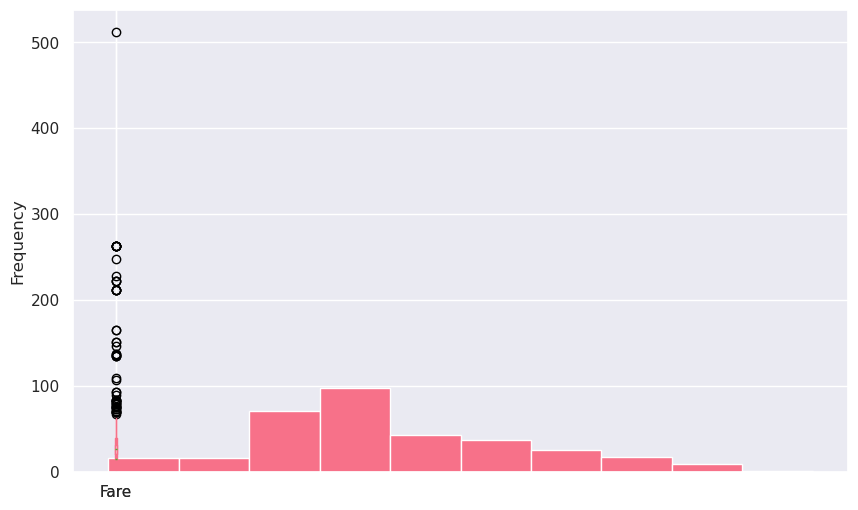

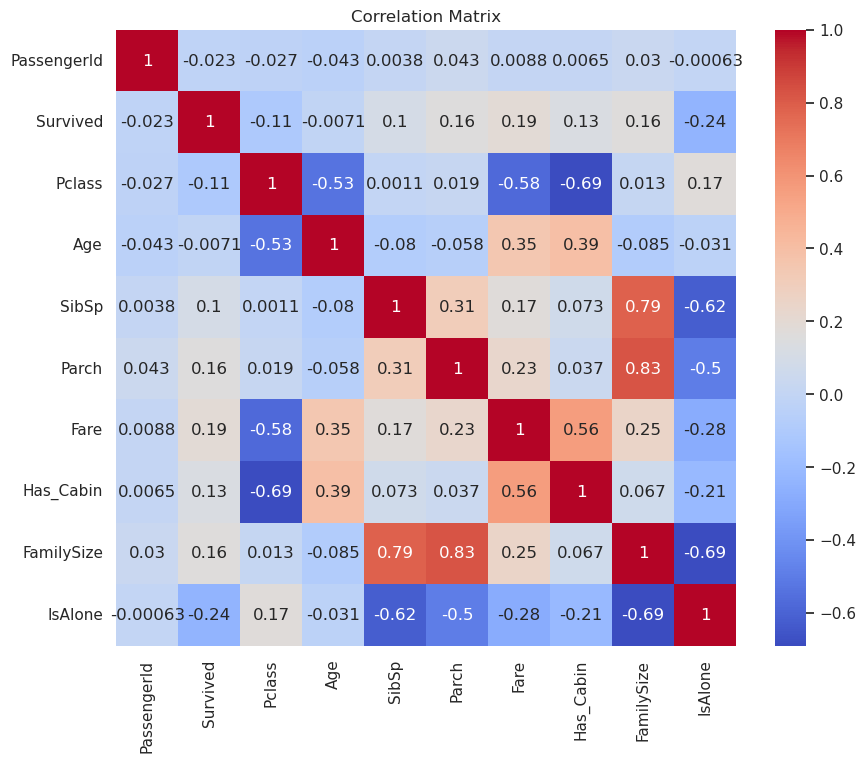

In [23]:
# =========================================
# 5. Correlation between numerical variables
# =========================================
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

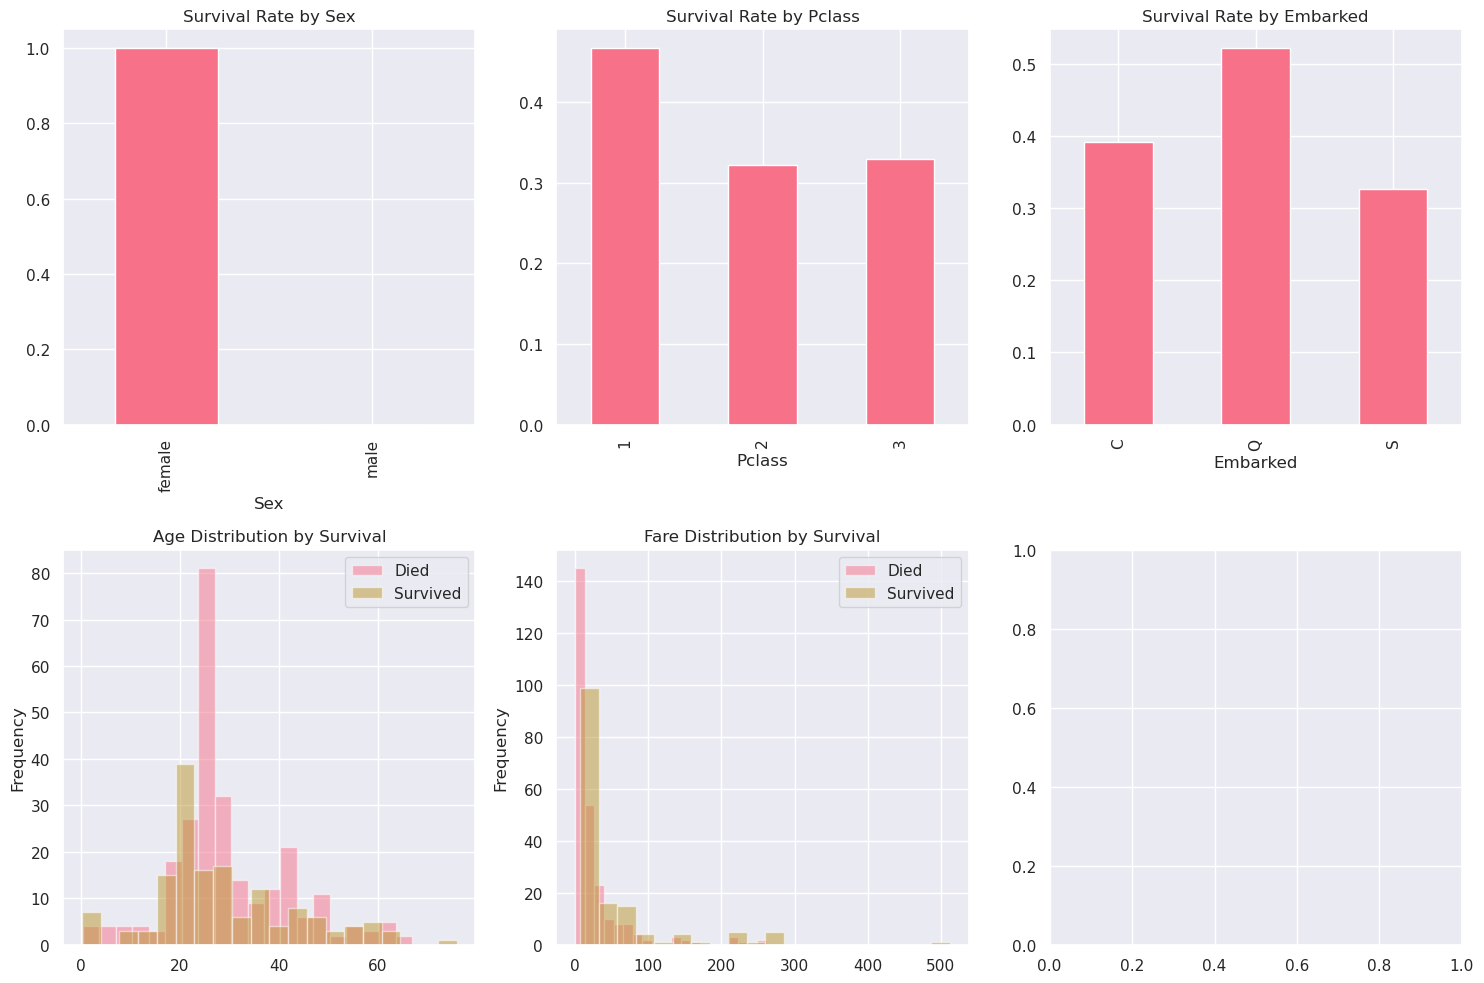

In [24]:
# Survival by different features
fig, axes = plt.subplots(2,3, figsize=(15,10))

# Survival by Sex
df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Sex')

df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Pclass')

df.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Survival Rate by Embarked')

# Age distribution by survival
df[df['Survived'] == 0]['Age'].plot(kind='hist', alpha=0.5, bins=20, ax=axes[1,0], label='Died')
df[df['Survived'] == 1]['Age'].plot(kind='hist', alpha=0.5, bins=20, ax=axes[1,0], label='Survived')
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].legend()

# Distribution of tariffs by survival
df[df['Survived'] == 0]['Fare'].plot(kind='hist', alpha=0.5, bins=20, ax=axes[1,1], label='Died')
df[df['Survived'] == 1]['Fare'].plot(kind='hist', alpha=0.5, bins=20, ax=axes[1,1], label='Survived')
axes[1,1].set_title('Fare Distribution by Survival')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [25]:
# =========================================
# 6. Transformation of categorical variables
# =========================================
df = pd.get_dummies(df, columns=['Sex','Embarked', 'Title'], drop_first=True)

# Drop columns not useful for modeling
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [26]:
# Interactive survival chart by age and class
fig = px.scatter(df, x='Age', y='Fare', color='Survived', 
                 facet_col='Pclass', hover_data=['Sex_male'],
                 title='Survival by Age, Fare and Class')
fig.show()

# Interactive box plot of fares by class and survival
fig = px.box(df, x='Pclass', y='Fare', color='Survived',
             title='Fare Distribution by Class and Survival')
fig.show()

In [27]:
# Identify outliers in Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in Fare: {len(outliers)}")

# Option: Apply log transformation to Fare
df['Fare_log'] = np.log1p(df['Fare'])

Number of outliers in Fare: 55
